# Homework IV

## II. Programming and critical analysis [9v]

Recall the _column_diagnosis.arff_ dataset from previous homeworks. For the following exercises, normalize the data using sklearn’s MinMaxScaler.

1) [4v] Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 𝑘 $\in $ {2,3,4,5} (_random=0_ and remaining parameters as default). Assess the silhouette and purity of the produced solutions.

In [4]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin_min

# Load the ARFF dataset
data, meta = arff.loadarff("column_diagnosis.arff")
df = pd.DataFrame(data)

# Convert the "class" column to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=['class']))

# Values of k to be tested
k_values = [2, 3, 4, 5]

# Initialize lists to store results
silhouette_scores = []
purity_scores = []

for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(normalized_data)

    # Compute silhouette score
    silhouette = silhouette_score(normalized_data, cluster_labels)

    # Calculate purity
    closest_to_centers = pairwise_distances_argmin_min(kmeans.cluster_centers_, normalized_data)[0]
    cluster_purity = 0
    for i in range(k):
        cluster_mask = (cluster_labels == i)
        majority_class = df['class'][cluster_mask].value_counts().max()
        cluster_purity += majority_class
    cluster_purity /= len(cluster_labels)

    silhouette_scores.append(silhouette)
    purity_scores.append(cluster_purity)

# Print the results
for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}: Silhouette Score = {silhouette:.15f}, Purity = {purity:.15f}')

K=2: Silhouette Score = 0.360441243404411, Purity = 0.632258064516129
K=3: Silhouette Score = 0.295790557300023, Purity = 0.667741935483871
K=4: Silhouette Score = 0.274424021223402, Purity = 0.661290322580645
K=5: Silhouette Score = 0.238239283978448, Purity = 0.677419354838710


2) [2v] Consider the application of PCA after the data normalization:

i. Identify the variability explained by the top two principal components.  \
ii. For each one of these two components, sort the input variables by relevance by 
inspecting the absolute weights of the linear projection.

In [5]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Load the ARFF dataset
data, meta = arff.loadarff("column_diagnosis.arff")
df = pd.DataFrame(data)

# Convert the "class" column to numeric using LabelEncoder
df['class'] = df['class'].str.decode('utf-8')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=['class']))

# Perform PCA to extract the top two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

# i. Explained variance by the top two principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by the Top Two Principal Components: {explained_variance}")

# ii. Sort input variables by relevance for each of the top two components
component_1_loadings = pca.components_[0]
component_2_loadings = pca.components_[1]

# Sort variables by absolute loadings for component 1
sorted_vars_component_1 = df.columns[abs(component_1_loadings).argsort()[::-1]]
sorted_loadings_component_1 = component_1_loadings[abs(component_1_loadings).argsort()[::-1]]

# Sort variables by absolute loadings for component 2
sorted_vars_component_2 = df.columns[abs(component_2_loadings).argsort()[::-1]]
sorted_loadings_component_2 = component_2_loadings[abs(component_2_loadings).argsort()[::-1]]

# Print the sorted variables and their loadings for the top two components
print("\nTop Two Principal Components - Sorted Variables and Loadings:")
print("Principal Component 1:")
for var, loading in zip(sorted_vars_component_1, sorted_loadings_component_1):
    print(f"{var}: {loading:.4f}")

print("\nPrincipal Component 2:")
for var, loading in zip(sorted_vars_component_2, sorted_loadings_component_2):
    print(f"{var}: {loading:.4f}")

Explained Variance by the Top Two Principal Components: [0.56181445 0.20955953]

Top Two Principal Components - Sorted Variables and Loadings:
Principal Component 1:
pelvic_incidence: 0.5916
lumbar_lordosis_angle: 0.5151
pelvic_tilt: 0.4670
sacral_slope: 0.3257
degree_spondylolisthesis: 0.2169
pelvic_radius: -0.1158

Principal Component 2:
pelvic_tilt: -0.6704
pelvic_radius: -0.5811
sacral_slope: 0.4433
pelvic_incidence: 0.1000
lumbar_lordosis_angle: 0.0800
degree_spondylolisthesis: 0.0046


3) [2v] Visualize side-by-side the data using: i) the ground diagnoses, and ii) the _previously_ learned 𝑘 =3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.

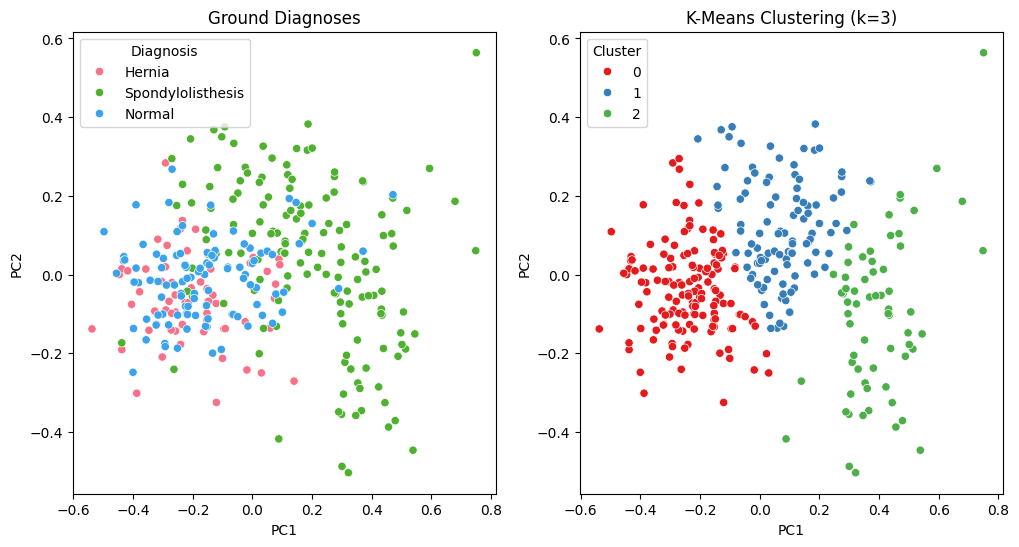

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.iloc[:, :-1])

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the diagnosis labels to the PCA DataFrame
pca_df['Diagnosis'] = df['class'].str.decode('utf-8')  # Decode bytes to strings

# Create a palette of colors based on unique values in the 'Diagnosis' column
value_palette = sns.color_palette("husl", len(pca_df['Diagnosis'].unique()))

# Map colors to values in the 'Diagnosis' column
value_colors = {value: color for value, color in zip(pca_df['Diagnosis'].unique(), value_palette)}

# Visualize the data side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette=value_colors)
plt.title('Ground Diagnoses')

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_data)

# Create a palette of colors based on unique values in the 'cluster_labels' array
cluster_palette = sns.color_palette("Set1", len(np.unique(cluster_labels)))

# Map colors to values in the 'cluster_labels' array
cluster_colors = {cluster: color for cluster, color in zip(np.unique(cluster_labels), cluster_palette)}

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette=cluster_colors)
plt.title('K-Means Clustering (k=3)')

plt.show()

&nbsp;&nbsp;Ao usarmos clusters podemos criar "grupos" que representam diferentes condições e grupos de risco. Por exemplo, como no exercício 3, tendo um clustering de k=3, pode originar-se 3 clusters, em que cada um identifica um tipo diferente de condição. Um pode ser para pessoas que sejam saudáveis enquanto que as outras duas categorias são para pessoas com problemas diferentes de saúde. Esta distinção é importante e útil porque facilita na escolha de tratamento de paciente para paciente. Para além dessa vantagem, os clusters podem também associar certas categorias de risco a certos problemas (Exemplo hipotético: Se a pelvic_tilt for superior a 20, o paciente é mais propício a ter uma hérnia).  \
&nbsp;&nbsp;Outra vantagem de usarmos clusters é que estes ajudam-nos a encontrar outliers, ou seja, indivíduos com padrões de saúde incomuns e raros. Estes casos podem ser revistos e investigados com mais pormenor de forma a dar o tratamento mais adequado à pessoa.
